# LicitaCon/TCE-RS: Exploratory Data Analysis




Author: Karlson Tellicio Bezerra de Lima

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import unidecode
import nltk
import re
import matplotlib.pyplot as plt
%matplotlib inline 

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 999)

path = 'item-licitacao.csv'
df = pd.read_csv(path, encoding='utf-8', header=0, sep=',', decimal=",", index_col=0);

/home/ktellicio/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2,7,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,88) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/ktellicio/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [195]:
df_date = df
df_date = df_date[df_date['DT_ADJUDICACAO'].notna()]
df_date = df_date[df_date['NR_DOCUMENTO'].notna()]
df_date['month'] = pd.DatetimeIndex(df_date['DT_ADJUDICACAO']).month
df_date['year'] = pd.DatetimeIndex(df_date['DT_ADJUDICACAO']).year
print("df_date.shape: ", df_date.shape)

df_date.shape:  (374784, 90)


In [196]:
tick_dict = {
'2.0' : "equipamentos/materiais p/escritorio/escola/artes plasticas",
'3.0' : "servicos técnicos: projetos/auditorias/ consultorias/assessorias",
'7.0' : "serviços de engenharia/obras: resíduos sólidos",
'8.0' : "serviços de engenharia/obras: edificações",
'9.0' : "serviços de engenharia/obras: rodovias, ferrovias e aeroportos",
'10.0' : "serviços de engenharia/obras: obras-de-arte-especiais",
'11.0' : "serviços de engenharia/obras: urbanização",
'12.0' : "serviços de engenharia/obras: infraestrutura de energia",
'13.0' : "serviços de engenharia/obras: saneamento",
'14.0' : "serviços de engenharia/obras: obras portuárias, marítimas e fluviais",
'15.0' : "serviços de engenharia/obras: serviços especializados para construção",
'16.0' : "serviços de engenharia/obras: inst. elétricas, hidráulicas e outras inst. em construções",
'17.0' : "serviços de engenharia/obras: serviços técnicos de engenharia e arquitetura",
'29.0' : "serviços: credenciamento de serviços de educação",
'30.0' : "serviços: credenciamento de serviços de saúde",
'31.0' : "servicos: terceirizacao de mao-de-obra especializada",
'33.0' : "materiais p/escritório",
'34.0' : "materiais/ suprimentos p/informatica",
'35.0' : "equipamentos p/informatica",
'37.0' : "servicos: terceirizacao de mao-de-obra",
'42.0' : "servicos: transporte de cargas e passageiros",
'45.0' : "servicos: graficos/similares",
'47.0' : "servicos: som, imagem e programacao visual",
'52.0' : "servicos: manutencao de veiculos, equipamentos e aeronaves",
'57.0' : "servicos: manut/equip/escrit/eletrodomesticos/refrigeracao",
'59.0' : "servicos: serralheria/marcen./carpin./metalurgica/fundicao",
'62.0' : "servicos: locacao de veiculos, equipamentos e aeronaves",
'63.0' : "serviços: locacao de imoveis",
'64.0' : "aquisição de imoveis",
'70.0' : "maquinas p/autenticar/registrar/franquear e similares",
'72.0' : "servicos: vigilancia/seguranca/transporte de valores",
'77.0' : "servicos: alimentacao",
'82.0' : "servicos: hotelaria/agencias de viagem e turismo",
'97.0' : "servicos: bilheteria / estacionamento",
'105.0' : "livros/publicacoes/revistas",
'107.0' : "servicos: seguros",
'112.0' : "servicos: contratacao parceria/invest./arrend/merchandising",
'113.0' : "servicos: contratacao instituicao de ensino superior",
'117.0' : "servicos: informatica-software/hardware",
'120.0' : "papel/papelao/cartao/cartolina",
'122.0' : "servicos: fornecimento de vales/tickets",
'127.0' : "servicos: analises clinicas/laborat. e exames medicos/odont.",
'140.0' : "equipamentos/materiais p/recreacao/deficientes",
'150.0' : "instrumentos musicais/componentes/acessorios",
'160.0' : "equipamentos/materiais esportivos",
'185.0' : "embalagens em geral/cordas/barbantes/fitas (exceto p/med.)",
'205.0' : "bandeiras/flamulas/acessorios",
'215.0' : "servicos: insignias/brasoes/escudos/medalhas/trofeus/brindes",
'245.0' : "vestuarios/uniformes (exceto vestuario de seguranca)",
'250.0' : "calcados/bolsas/malas/mochila (exceto de seguranca)",
'255.0' : "materiais de armarinho/aviamentos",
'260.0' : "materiais p/cama/mesa/banho",
'270.0' : "equipamentos/materiais p/microfilmagem",
'285.0' : "eletrodomesticos",
'290.0' : "equipamentos/componentes/acessorios p/climatizacao",
'295.0' : "equipamentos/materiais/acessorios p/projecao/video/foto/som",
'320.0' : "moveis/estofados/componentes em geral",
'345.0' : "colchoes/colchonetes/travesseiros/almofadas/revestimentos",
'350.0' : "equipamentos/materiais/acessorios p/uso comercial/industrial",
'360.0' : "utensilios e materiais descartaveis p/copa/cozinha",
'380.0' : "equipamentos/materiais p/limpeza/higiene (uso geral)",
'390.0' : "equipamentos/acessorios p/acampamento",
'395.0' : "equipamentos/componentes/acessorios p/radiotelecomunicacao",
'397.0' : "equipamentos/componentes/acessorios p/radiodifusao",
'400.0' : "equipamentos/componentes/acessorios p/telefonia",
'405.0' : "equipamentos/componentes/acessorios p/medicao",
'410.0' : "equipamentos p/geracao/distribuicao de energia eletrica",
'420.0' : "componentes p/equipamentos eletricos/eletronicos",
'428.0' : "equipamentos p/controle de pessoal",
'435.0' : "equipamentos/componentes/acessorios p/solda (em geral)",
'440.0' : "feramentas manuais (uso geral)",
'445.0' : "equipamentos eletricos p/oficinas (uso geral)",
'450.0' : "ferragens/abrasivos",
'452.0' : "arames/telas",
'460.0' : "madeiras em geral",
'461.0' : "materia-prima plastica/sintetica/borracha/derivados",
'463.0' : "materia-prima p/metalurgia",
'465.0' : "equipamentos/materiais p/construcao civil",
'475.0' : "equipamentos/materiais p/instalacoes eletricas",
'480.0' : "equip./materiais p/instalacoes hidrosanitarias e gas natural",
'495.0' : "vidros planos/espelhos",
'505.0' : "materiais p/decoracao de interiores",
'510.0' : "obras de arte/objetos decorativos",
'515.0' : "equipamentos/materiais de seguranca e protecao",
'535.0' : "bombas/motobombas/compressores/componentes/acessorios",
'540.0' : "equipamentos/materiais p/irrigacao",
'548.0' : "equipamentos/materiais/suprimentos tratamento de agua/esgoto",
'550.0' : "equipamentos/pecas/aces. p/constr./conserv. rodovias/portos",
'555.0' : "equipamentos/pecas/acessorios p/mineracao/escavacao",
'565.0' : "equipamentos/acessorios p/transporte de mercadorias",
'580.0' : "equipamentos/pecas/acessorios p/ajardinamento",
'593.0' : "elevadores/pontes rolantes/guindastes/talhas",
'595.0' : "veiculos",
'600.0' : "equipamentos/pecas/materiais/acessorios p/conserv. veiculos",
'685.0' : "equipamentos/pecas/acessorios p/agricultura/pecuaria e pesca",
'736.0' : " alimentacao humana especial/manipuladas/fracionada",
'745.0' : "pneus/camaras/protetores/materiais p/consertos",
'748.0' : "equipamentos/pecas/acessorios p/navegacao",
'750.0' : "materiais/acessorios/pecas fundidas",
'754.0' : "equipamentos p/lancamentos/pouso/manobras de aeronaves",
'757.0' : "combustiveis/lubrificantes/derivados de petroleo",
'758.0' : "botijoes/instalacoes industriais de gas glp",
'760.0' : "armamentos/explosivos/municoes",
'773.0' : "alimentacao humana - prod.origem animal in natura",
'775.0' : "alimentacao humana - prod.especial/manipulados/pre-elaborado",
'779.0' : "alimentacao humana-prod.origem animal embutidos",
'784.0' : "alimentacao humana - produtos de origem vegetal in natura",
'788.0' : "alimentacao humana - laticinios e correlatos",
'792.0' : "alimentacao humana - produtos nao pereciveis",
'796.0' : "alimentacao humana - produtos de panificacao",
'802.0' : "alimentacao humana: enteral/oral",
'803.0' : "alimentacao humana: produtos coloniais",
'805.0' : "equipamentos e gases uso hopitalar/laboratorial/industrial",
'820.0' : "equipamentos/materiais p/industria farmaceutica",
'830.0' : "equipamentos/materiais p/laboratorio",
'855.0' : "diagnostica",
'870.0' : "equipamentos/materiais medico-hospitalares/enfermagem",
'880.0' : "medicamentos de uso humano",
'882.0' : "medicamentos importados (uso humano)",
'884.0' : "medicamentos de uso humano - excepcionais",
'886.0' : "medicamentos de uso humano - especiais",
'888.0' : "medicamentos de uso humano - genericos",
'890.0' : "materiais p/higiene pessoal/profilaxia",
'905.0' : "servicos: orteses/proteses",
'910.0' : "equipamentos/materiais odontologicos",
'930.0' : "equipamentos/materiais/medicamentos veterinarios",
'950.0' : "animais",
'960.0' : "forragens e outros alimentos p/animais",
'965.0' : "adubos/corretivos do solo",
'970.0' : "defensivos agricolas/domesticos",
'980.0' : "sementes/mudas de plantas",
'990.0' : "produtos quimicos de limpeza/higiene"
}

##  Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?

['medicamentos de uso humano', 'equipamentos/pecas/materiais/acessorios p/conserv. veiculos', 'equipamentos/materiais p/escritorio/escola/artes plasticas', 'serviços de engenharia/obras: edificações', 'equipamentos/materiais medico-hospitalares/enfermagem', 'alimentacao humana - produtos nao pereciveis', 'alimentacao humana - produtos de origem vegetal in natura', 'serviços de engenharia/obras: saneamento', 'equipamentos/materiais odontologicos', 'equipamentos/materiais p/limpeza/higiene (uso geral)']


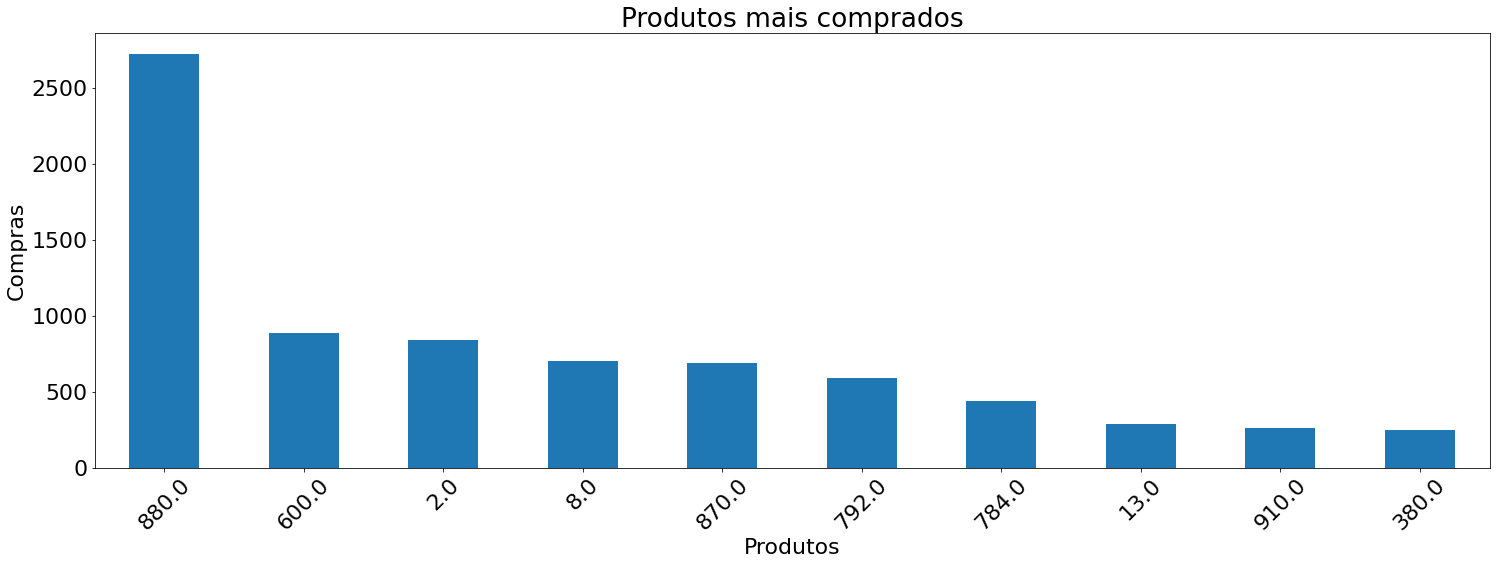

In [198]:
C = 0 
step = 10

fam = df_date['CD_TIPO_FAMILIA'].value_counts()[C*step: (C+1)*step]
fam_int = list( map(int, list(map(float, fam.index)) ) )


x_labels = []
for tick in fam.index:
    x_labels.append(tick_dict.get(tick))


fig, ax = plt.subplots()

ax.set_xlabel('Produtos')
ax.set_ylabel('Compras')
ax.set_title('Produtos mais comprados')

loc = np.arange(len(x_labels)) 
ax.set_xticks(loc)
ax.set_xticklabels(x_labels)

fam.plot(kind='bar', rot=45, figsize=(25,8), ax=ax)

print(x_labels)

Os principais bens comprados pelos orgãos públicos do RS são:
    01. medicamentos de uso humano
    02. equipamentos/pecas/materiais/acessorios p/conserv. veiculos
    03. quipamentos/materiais p/escritorio/escola/artes plasticas
    04. serviços de engenharia/obras: edificações
    05. equipamentos/materiais medico-hospitalares/enfermagem
    06. alimentacao humana - produtos nao pereciveis
    07. alimentacao humana - produtos de origem vegetal in natura
    08. serviços de engenharia/obras: saneamento
    09. equipamentos/materiais odontologicos
    10. equipamentos/materiais p/limpeza/higiene (uso geral)

## É possível identificar algum padrão nas compras por época do ano?

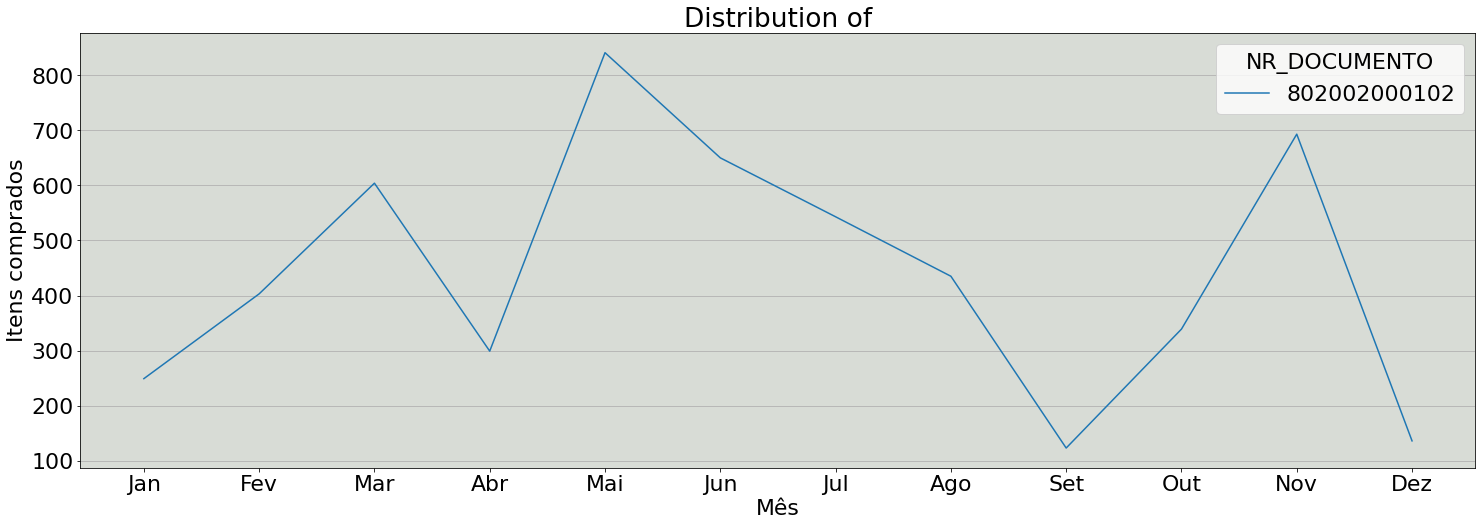

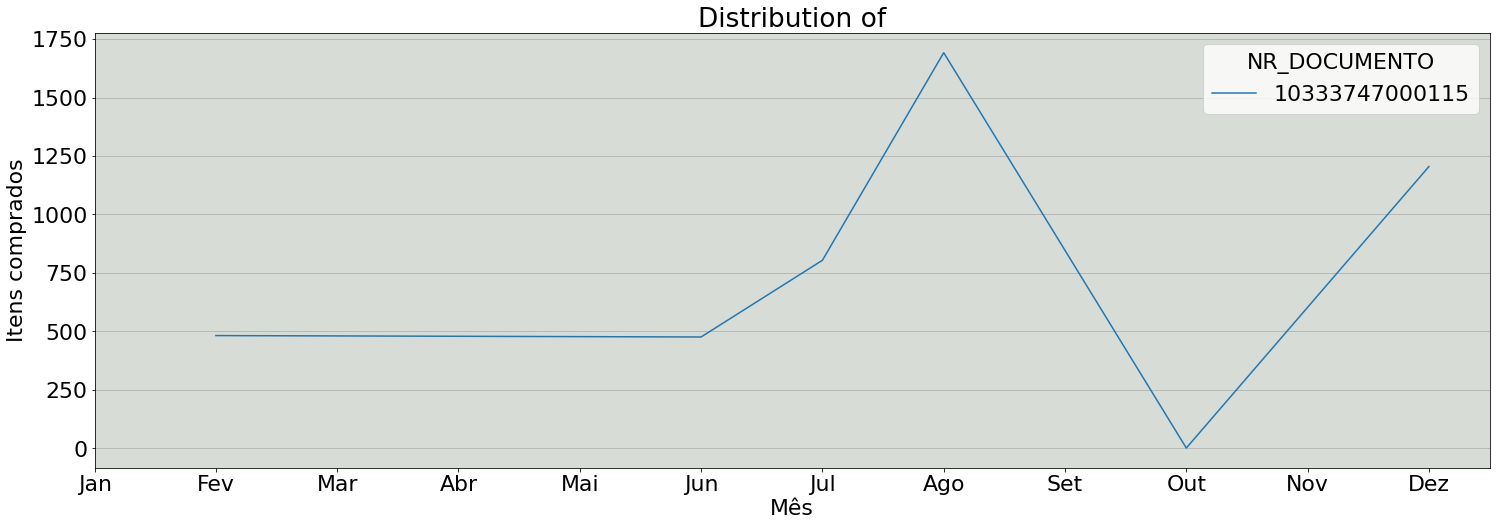

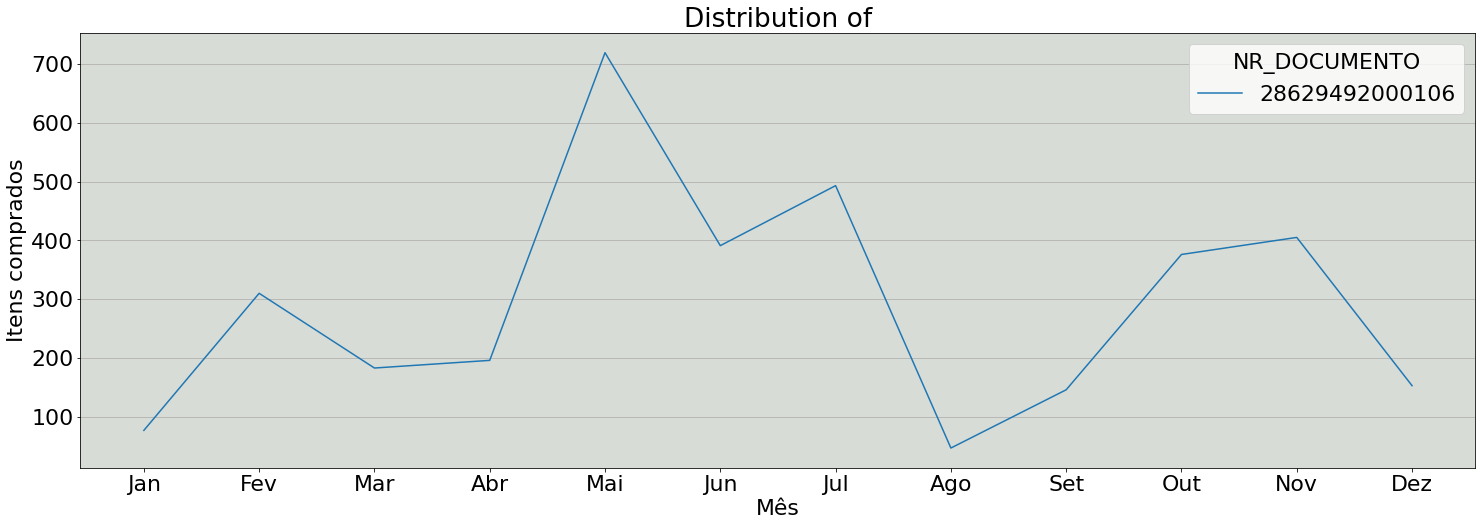

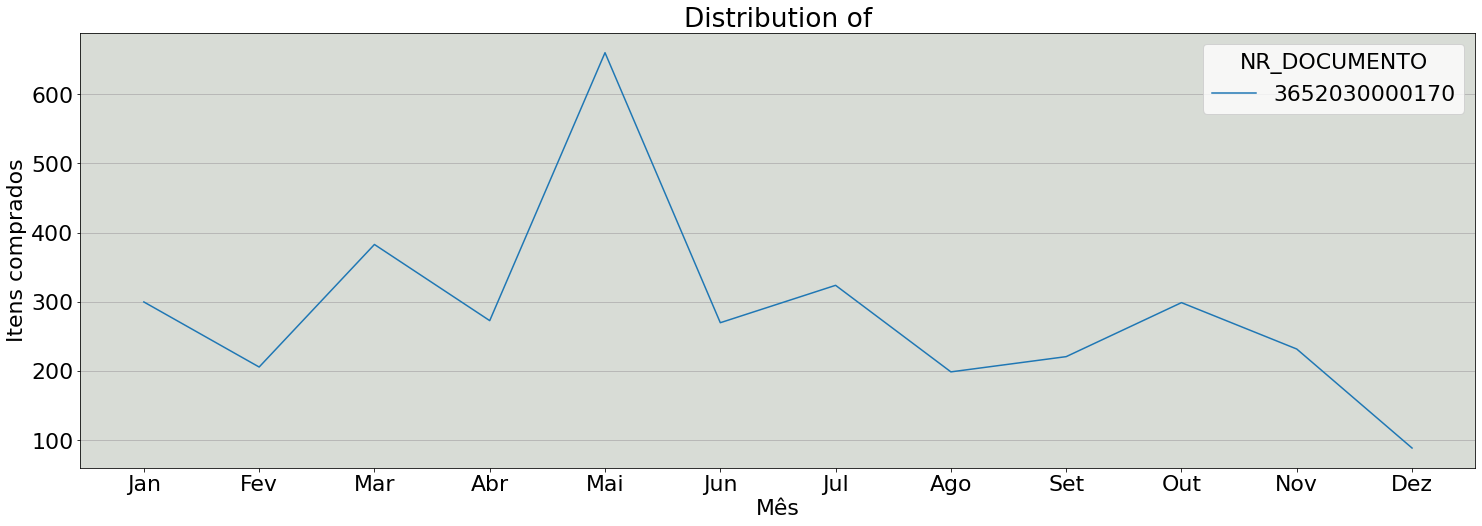

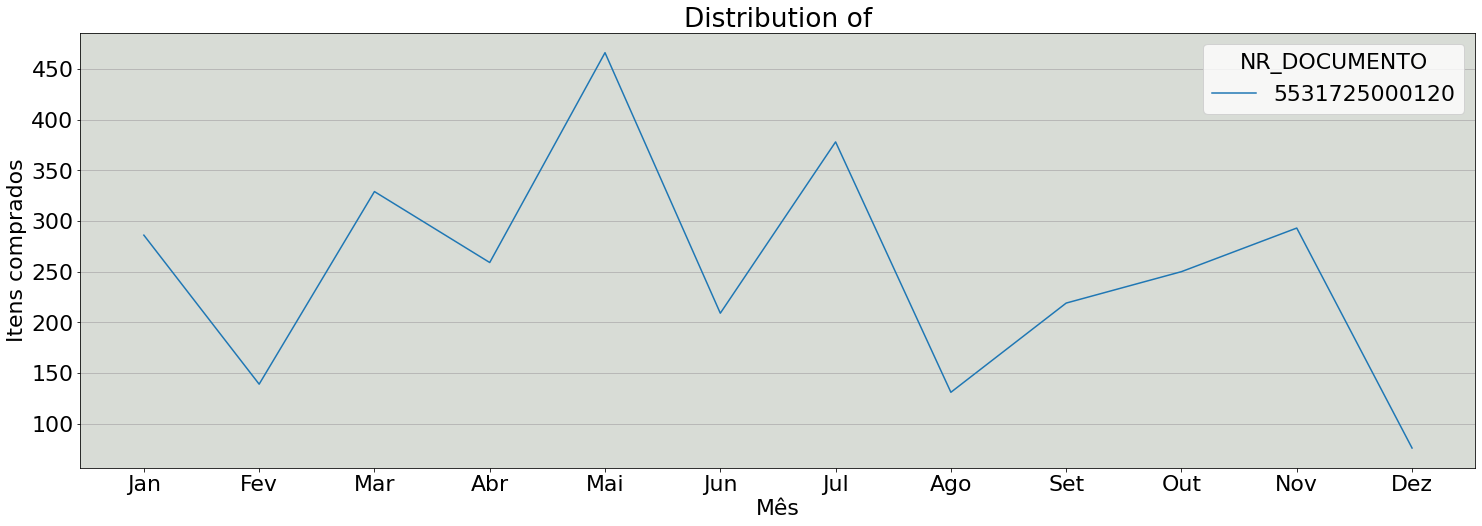

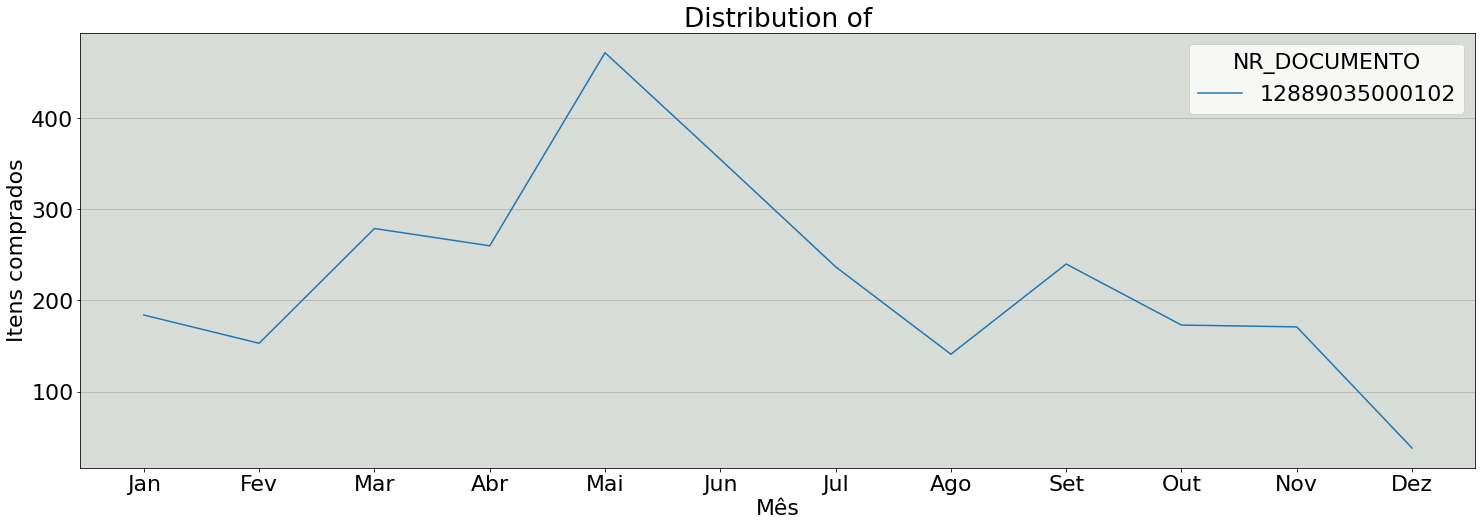

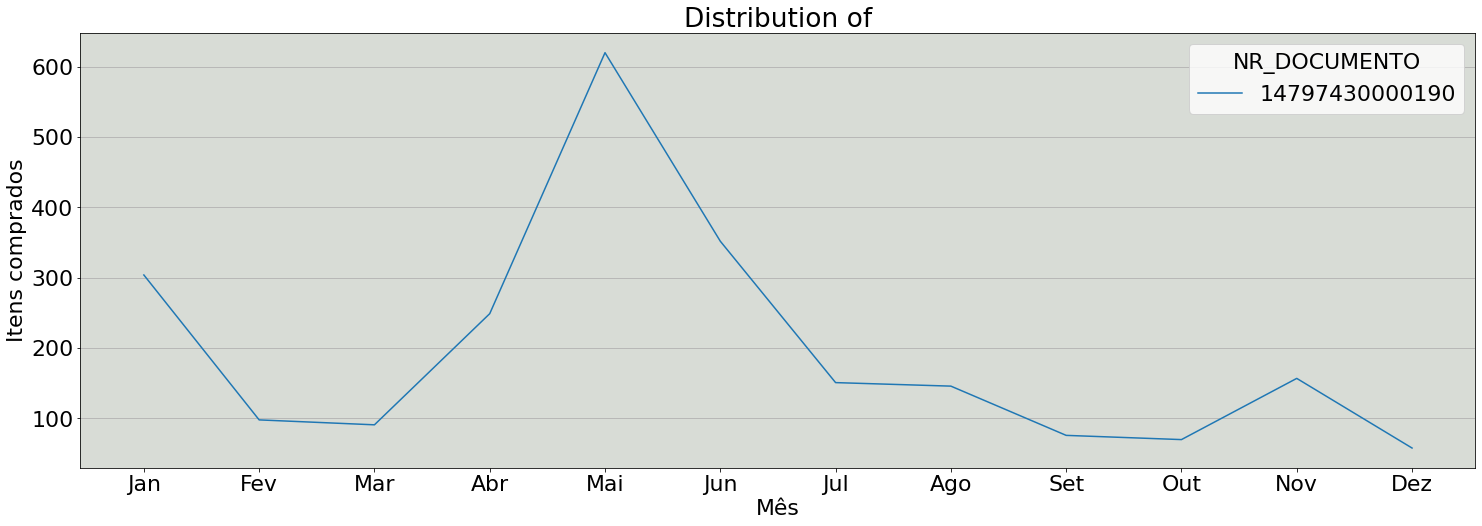

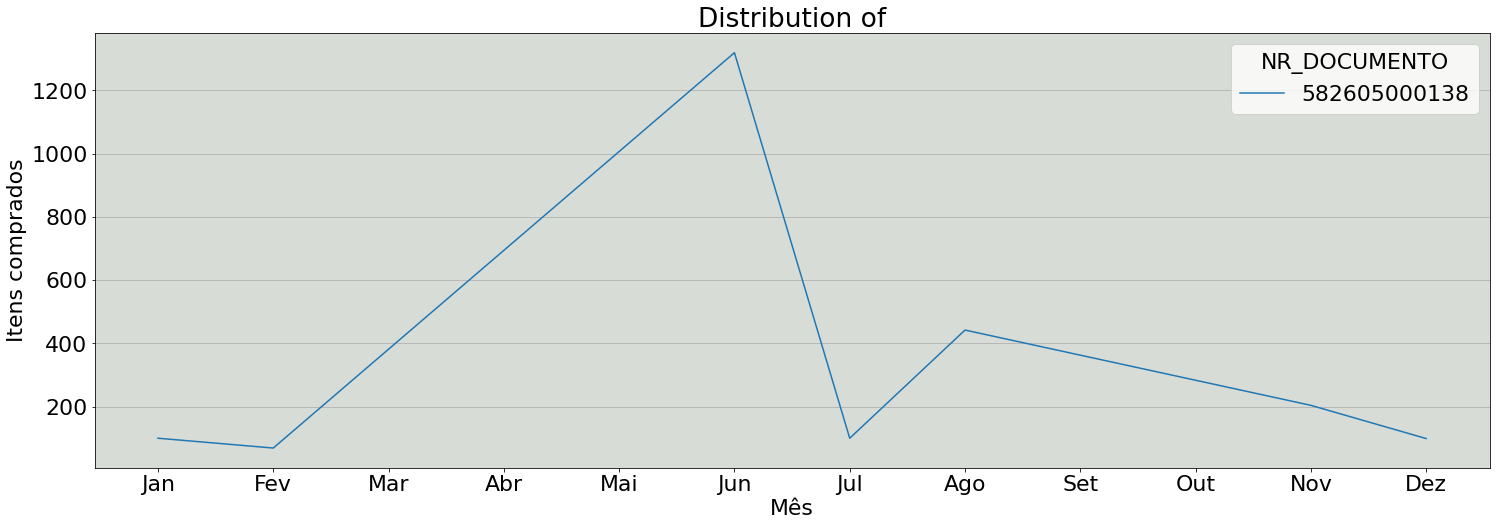

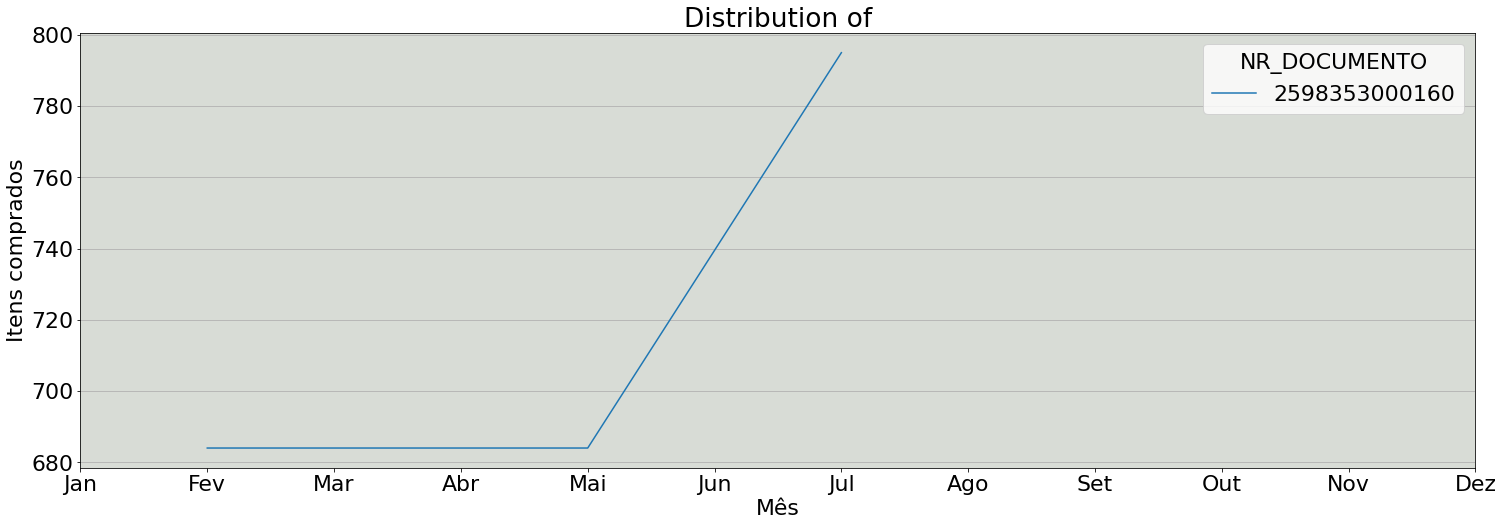

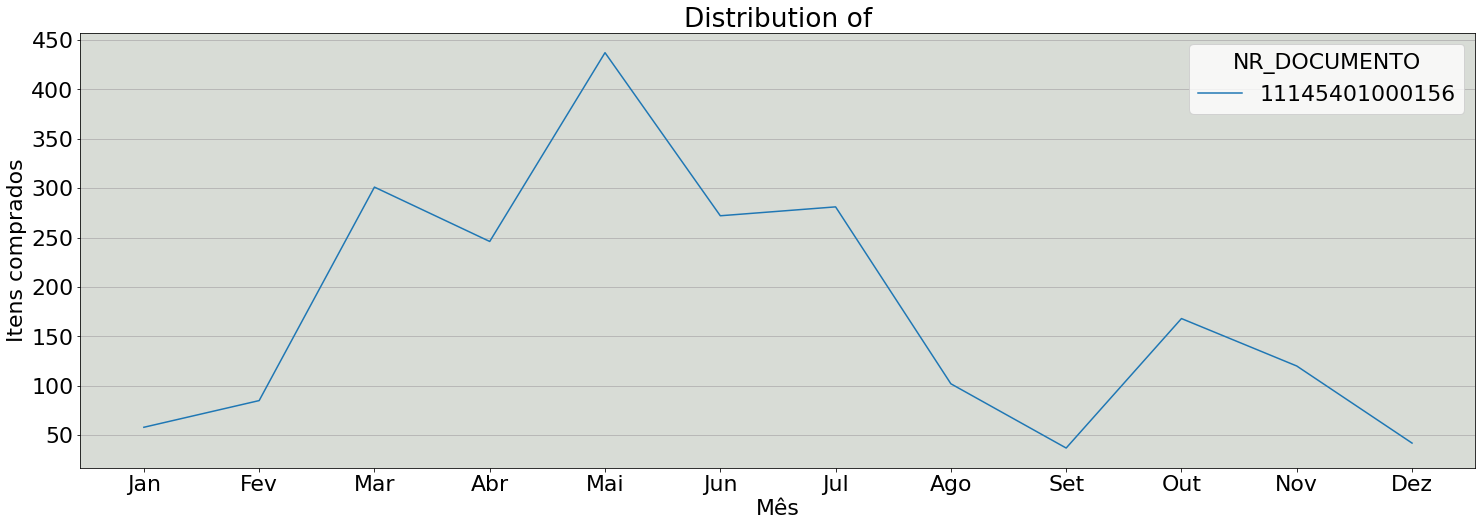

In [220]:
C = 0 
step = 10
top = df_date['NR_DOCUMENTO'].value_counts()[C*step : (C+1)*step].index

df_top = df_date[df_date['NR_DOCUMENTO'].isin(top)]

labels =  np.arange(1,13);
ticks = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.rcParams.update({'font.size': 22});

for i in top:
    fig, ax = plt.subplots(figsize=(25,8))
    df_i = df_top[df_top['NR_DOCUMENTO']==i]
    
    df_gb = df_i.groupby(['month', 'NR_DOCUMENTO']).size().unstack(level=1)
    df_gb.plot(ax=ax)
    
    ax.set_xlabel('Mês')
    ax.set_ylabel('Itens comprados')
    ax.grid(axis='y')
    ax.figsize=(25,8)
    ax.set_facecolor('#d8dcd6')
    ax.set_title('Distribution of')
    plt.xticks(labels, ticks);

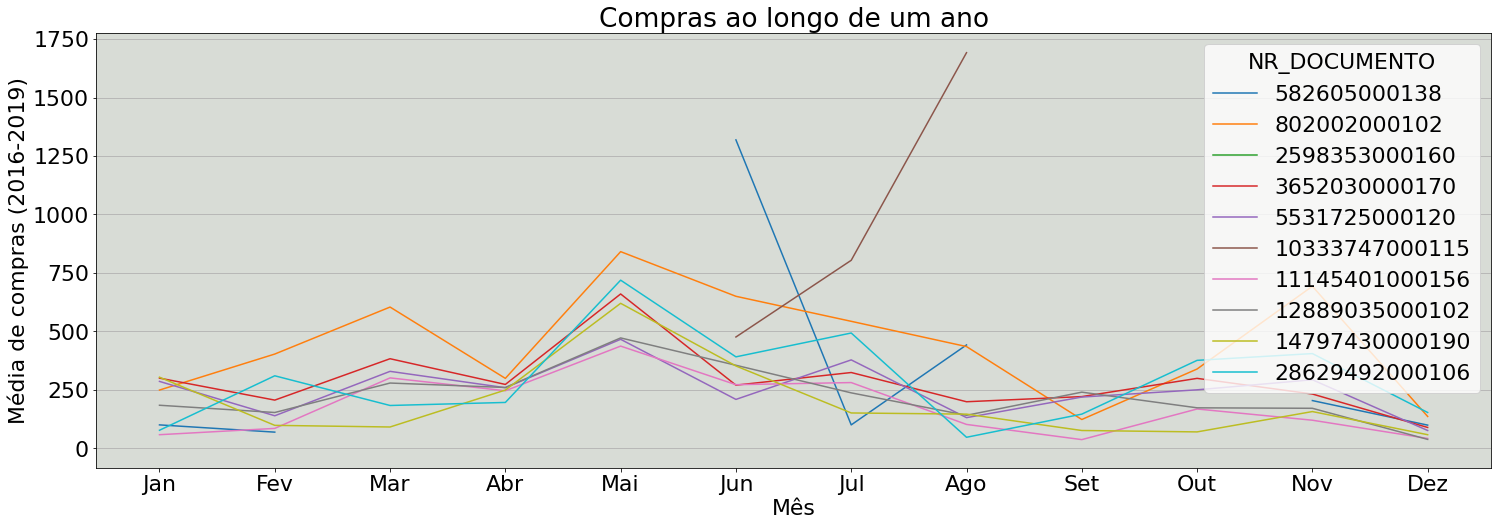

In [28]:
df_gb = df_top.groupby(['month', 'NR_DOCUMENTO']).size().unstack(level=1)
plt.rcParams.update({'font.size': 22});
fig, ax = plt.subplots(figsize=(25,8))
df_gb.plot(ax=ax)

ax.set_xlabel('Mês')
ax.set_ylabel('Média de compras (2016-2019)')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')
ax.set_title('Compras ao longo de um ano')
labels =  np.arange(1,13);
ticks = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(labels, ticks);

In [211]:
df_temp = df_org
df_temp['month'] = pd.DatetimeIndex(df_temp['DT_ADJUDICACAO']).month
df_temp['year'] = pd.DatetimeIndex(df_temp['DT_ADJUDICACAO']).year
print("df_org.shape: ", df_temp.shape)

df_org_gb = df_temp.groupby(['month', 'NM_ORGAO']).size().unstack(level=1)
df_org_gb["sum"] = df_org_gb.mean(axis=1)

df_org.shape:  (684739, 90)


Text(0.5, 0, 'Mês')

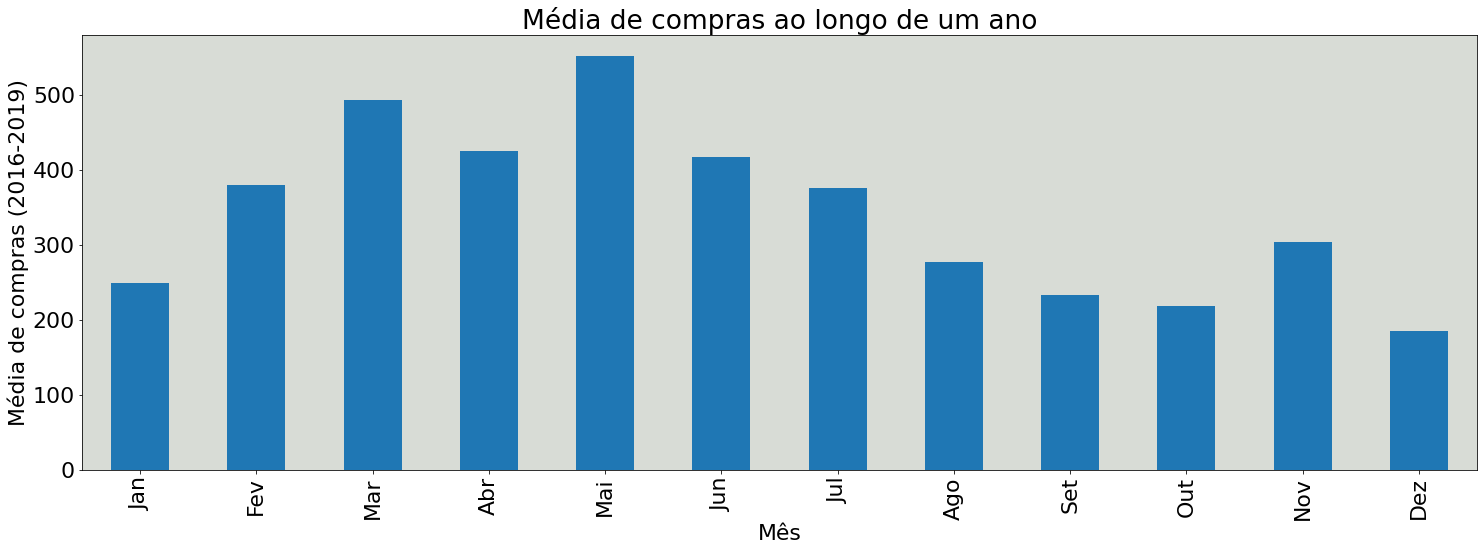

In [227]:
plt.rcParams.update({'font.size': 22});
fig, ax = plt.subplots(figsize=(25,8))

ax.set_ylabel('Média de compras (2016-2019)')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')
ax.set_title('Média de compras ao longo de um ano')

df_org_gb['sum'].plot(kind='bar', ax=ax)

labels =  np.arange(0,12);
ticks = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(labels, ticks);
ax.set_xlabel('Mês')

É possível perceber que o mes de maio é onde há um maior número de compras licitadas. Os 10 maiores fornecedores também têm as maiores vendas em torno de maio.

## É possível identificar algum padrão nas compras por tipo de órgão comprador?

CIA. CARRIS PORTO-ALEGRENSE                      28557
SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL    22363
PM DE ALEGRETE                                   18086
PM DE GUAPORÉ                                    14747
PM DE VENÂNCIO AIRES                             12028
PM DE PELOTAS                                    11127
PM DE GETÚLIO VARGAS                             10920
PM DE IJUÍ                                       10821
PM DE CANGUÇU                                    10762
PM DE JÚLIO DE CASTILHOS                          9770
SECRETARIA DA SAÚDE DO RS                         9674
CIA. DE DESENV. DE CAXIAS DO SUL                  9662
PM DE SANT'ANA DO LIVRAMENTO                      9623
PM DE ALTO FELIZ                                  8917
CENTRAL DE LICITAÇÕES DO ESTADO                   8547
Name: NM_ORGAO, dtype: int64


<AxesSubplot:>

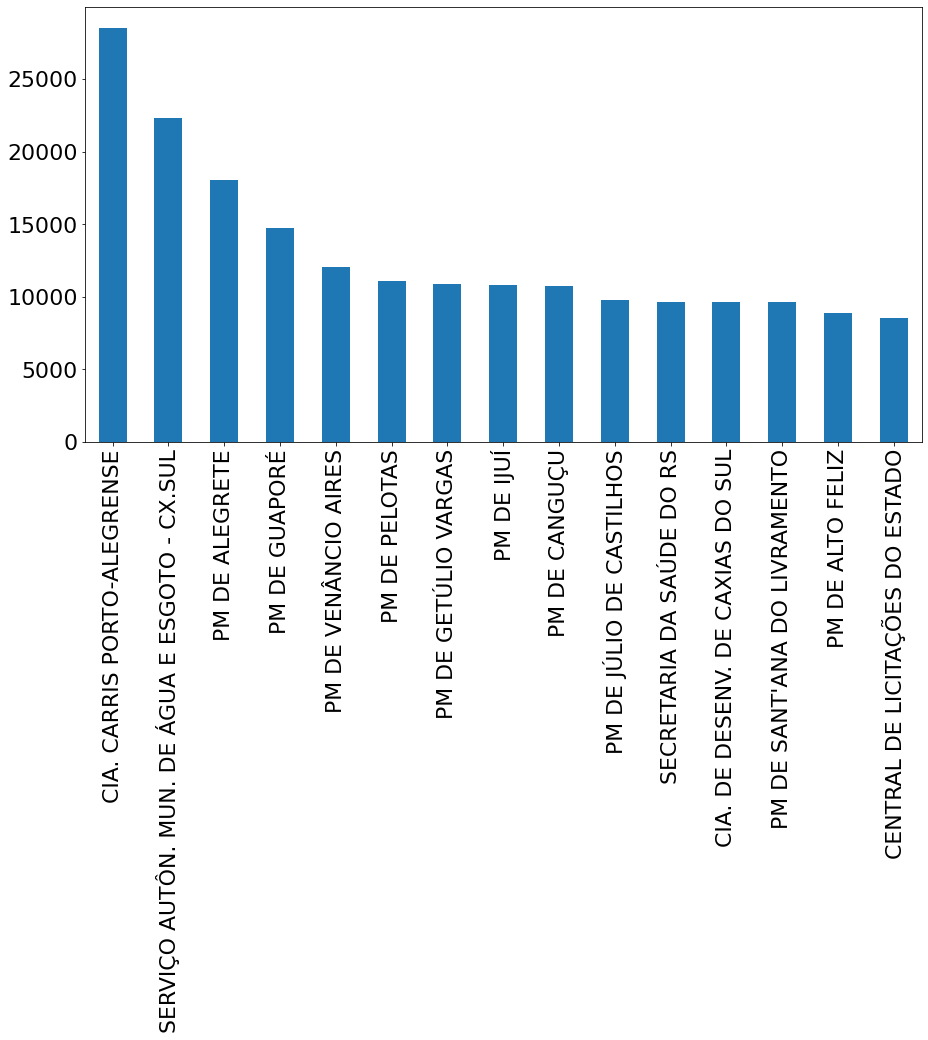

In [218]:
df_org = df
df_org = df_org[df_org['NM_ORGAO'].notna()]

C = 0
step = 15
top_org = df_org['NM_ORGAO'].value_counts()[C*step : (C+1)*step].index
df_top_org = df_org[df_org['NM_ORGAO'].isin(top_org)]

print(df_top_org['NM_ORGAO'].value_counts()[C*step: (C+1)*step])
df_top_org['NM_ORGAO'].value_counts().plot(kind='bar', figsize=(15,8))

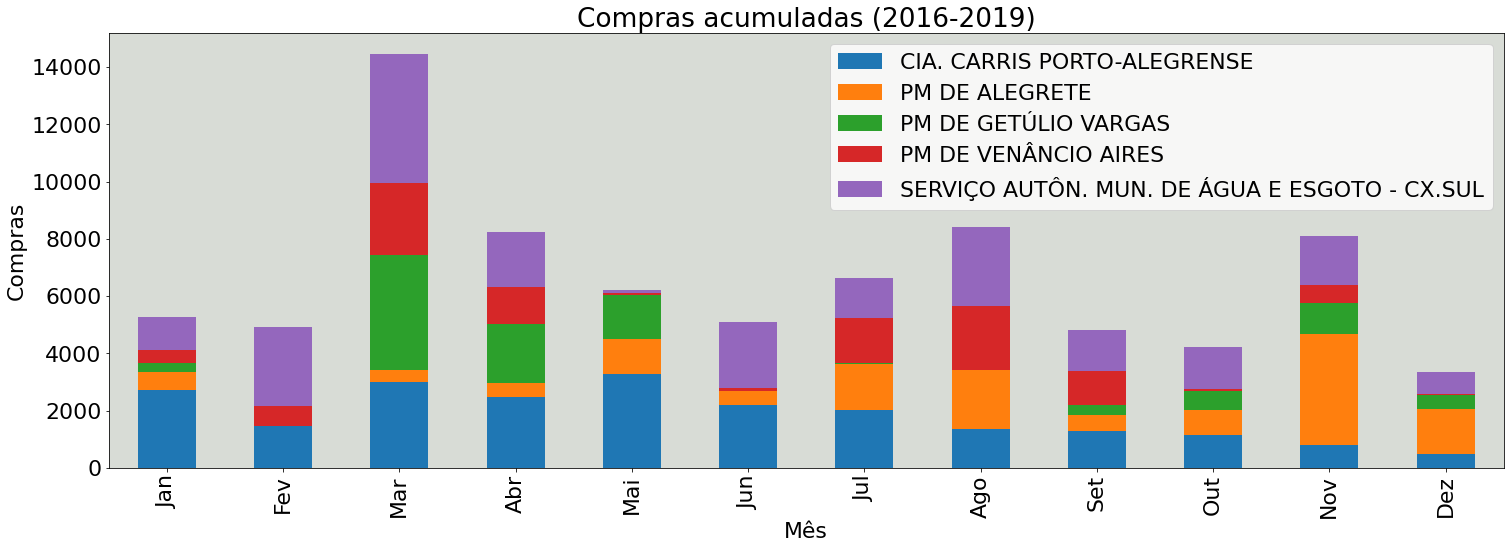

In [219]:
n_min = 10000

count = pd.DataFrame()
for i in df_org_gb.columns:
    if(df_org_gb[i].sum() >= n_min):
        count[i] = df_org_gb[i]

plt.rcParams.update({'font.size': 22});

fig, ax = plt.subplots(figsize=(25,8));

ax.set_ylabel('Compras');
ax.grid(axis='y');
ax.set_facecolor('#d8dcd6');
ax.set_title('Compras acumuladas (2016-2019)');
count.plot(kind='bar', stacked=True, ax=ax);
plt.xticks(labels, ticks);
ax.set_xlabel('Mês');

## O que mais é possível descobrir sobre as licitações do estado?

É possível agrupar orgãos do estado e analisá-los em comparação com seus parecidos. Descobrir quais são os itens mais comprados pelos grupos e, assim, verificar quais são os orgãos que mais compram tais itens.

É possível utilizar o